### Spherical Feature Extraction using Spherical_VGG16

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
import torch
from torch.nn import BatchNorm2d
import torch.nn.functional as F
from SphereNet_PyTorch.spherenet import SphereConv2D, SphereMaxPool2D
"""
class SphereNet(torch.nn.Module):
    def __init__(self):
        super(SphereNet, self).__init__()
        self.conv1 = SphereConv2D(3, 32, stride=1)
        self.pool1 = SphereMaxPool2D(stride=2)
        self.conv2 = SphereConv2D(32, 64, stride=1)
        self.pool2 = SphereMaxPool2D(stride=2)

    def forward(self, x):
        x = F.relu(self.pool1(self.conv1(x)))
        x = F.relu(self.pool2(self.conv2(x)))
        return x
"""
class SphereNetVGG16(torch.nn.Module):
    def __init__(self):
        super(SphereNetVGG16, self).__init__()
        # conv_block_1
        self.conv1_1 = SphereConv2D(3 , 64, stride=1)
        self.conv1_2 = SphereConv2D(64, 64, stride=1)
        # conv_block_2
        self.conv2_1 = SphereConv2D(64 , 128, stride=1)
        self.conv2_2 = SphereConv2D(128, 128, stride=1)
        # conv_block_3
        self.conv3_1 = SphereConv2D(128, 256, stride=1)
        self.conv3_2 = SphereConv2D(256, 256, stride=1)
        self.conv3_3 = SphereConv2D(256, 256, stride=1)
        # conv_block_4
        self.conv4_1 = SphereConv2D(256, 512, stride=1)
        self.conv4_2 = SphereConv2D(512, 512, stride=1)
        self.conv4_3 = SphereConv2D(512, 512, stride=1)
        # conv_block_5
        self.conv5_1 = SphereConv2D(512, 512, stride=1)
        self.conv5_2 = SphereConv2D(512, 512, stride=1)
        self.conv5_3 = SphereConv2D(512, 512, stride=1)
        self.pool = SphereMaxPool2D(stride=2)
    """
        self.bn1  = BatchNorm2d(64)
        self.bn2  = BatchNorm2d(128)
        self.bn3  = BatchNorm2d(256)
        self.bn4  = BatchNorm2d(512)
    
    # BN added VGG16
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1_1(x)))
        x = F.relu(self.bn1(self.conv1_2(x)))
        x = self.pool(x)
        x = F.relu(self.bn2(self.conv2_1(x)))
        x = F.relu(self.bn2(self.conv2_2(x)))
        x = self.pool(x)
        x = F.relu(self.bn3(self.conv3_1(x)))
        x = F.relu(self.bn3(self.conv3_2(x)))
        x = F.relu(self.bn3(self.conv3_3(x)))
        x = self.pool(x)
        x = F.relu(self.bn4(self.conv4_1(x)))
        x = F.relu(self.bn4(self.conv4_2(x)))
        x = F.relu(self.bn4(self.conv4_3(x)))
        x = self.pool(x)
        x = F.relu(self.bn4(self.conv5_1(x)))
        x = F.relu(self.bn4(self.conv5_2(x)))
        x = F.relu(self.bn4(self.conv5_3(x)))
        x = self.pool(x)
        #x = F.relu(x)
        return x
    """
    # Pure VGG16
    def forward(self, x):
        x = F.relu(self.conv1_2(F.relu(self.conv1_1(x))))
        x = self.pool(x)
        x = F.relu(self.conv2_2(F.relu(self.conv2_1(x))))
        x = self.pool(x)
        x = F.relu(self.conv3_3(F.relu(self.conv3_2(F.relu(self.conv3_1(x))))))
        x = self.pool(x)
        x = F.relu(self.conv4_3(F.relu(self.conv4_2(F.relu(self.conv4_1(x))))))
        x = self.pool(x)
        x = F.relu(self.conv5_3(F.relu(self.conv5_2(F.relu(self.conv5_1(x))))))
        x = self.pool(x)
        return x
    
    def initialize_weights(self):
        for m in self.modules():
            if isinstance(m, SphereConv2D):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
    

In [3]:
"""
device = torch.device('cpu')
spheremodel = SphereNetVGG16().to(device)
# Retrieve SphereNet model state
sphere_dict = spheremodel.state_dict()

for k, v in sphere_dict.items():
    print(k,'-',v.shape)
"""

conv1_1.weight - torch.Size([64, 3, 3, 3])
conv1_1.bias - torch.Size([64])
conv1_2.weight - torch.Size([64, 64, 3, 3])
conv1_2.bias - torch.Size([64])
conv2_1.weight - torch.Size([128, 64, 3, 3])
conv2_1.bias - torch.Size([128])
conv2_2.weight - torch.Size([128, 128, 3, 3])
conv2_2.bias - torch.Size([128])
conv3_1.weight - torch.Size([256, 128, 3, 3])
conv3_1.bias - torch.Size([256])
conv3_2.weight - torch.Size([256, 256, 3, 3])
conv3_2.bias - torch.Size([256])
conv3_3.weight - torch.Size([256, 256, 3, 3])
conv3_3.bias - torch.Size([256])
conv4_1.weight - torch.Size([512, 256, 3, 3])
conv4_1.bias - torch.Size([512])
conv4_2.weight - torch.Size([512, 512, 3, 3])
conv4_2.bias - torch.Size([512])
conv4_3.weight - torch.Size([512, 512, 3, 3])
conv4_3.bias - torch.Size([512])
conv5_1.weight - torch.Size([512, 512, 3, 3])
conv5_1.bias - torch.Size([512])
conv5_2.weight - torch.Size([512, 512, 3, 3])
conv5_2.bias - torch.Size([512])
conv5_3.weight - torch.Size([512, 512, 3, 3])
conv5_3.bias -

In [4]:
"""
# Load pre-trained VGG16 model state
vgg16_dict = torch.load('C:/Users/ustundag/.cache/torch/checkpoints/vgg16-397923af.pth')
# Cut out the classifier layers at the end
vgg16_dict = {k: vgg16_dict[k] for k in vgg16_dict.keys() if 'classifier' not in k}

# Assign VGG16 weights to the layers of SphereNet
for (k_sph,v_sph), (k_vgg,v_vgg) in zip(sphere_dict.items(), vgg16_dict.items()):
    sphere_dict[k_sph] = v_vgg

for k, v in sphere_dict.items():
    print(k,'-',v.shape)
"""

conv1_1.weight - torch.Size([64, 3, 3, 3])
conv1_1.bias - torch.Size([64])
conv1_2.weight - torch.Size([64, 64, 3, 3])
conv1_2.bias - torch.Size([64])
conv2_1.weight - torch.Size([128, 64, 3, 3])
conv2_1.bias - torch.Size([128])
conv2_2.weight - torch.Size([128, 128, 3, 3])
conv2_2.bias - torch.Size([128])
conv3_1.weight - torch.Size([256, 128, 3, 3])
conv3_1.bias - torch.Size([256])
conv3_2.weight - torch.Size([256, 256, 3, 3])
conv3_2.bias - torch.Size([256])
conv3_3.weight - torch.Size([256, 256, 3, 3])
conv3_3.bias - torch.Size([256])
conv4_1.weight - torch.Size([512, 256, 3, 3])
conv4_1.bias - torch.Size([512])
conv4_2.weight - torch.Size([512, 512, 3, 3])
conv4_2.bias - torch.Size([512])
conv4_3.weight - torch.Size([512, 512, 3, 3])
conv4_3.bias - torch.Size([512])
conv5_1.weight - torch.Size([512, 512, 3, 3])
conv5_1.bias - torch.Size([512])
conv5_2.weight - torch.Size([512, 512, 3, 3])
conv5_2.bias - torch.Size([512])
conv5_3.weight - torch.Size([512, 512, 3, 3])
conv5_3.bias -

torch.Size([1, 3, 256, 512])


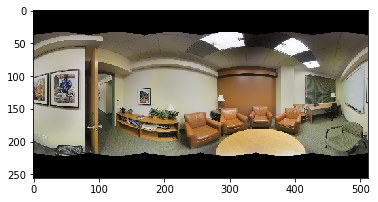

In [5]:
"""
import torchvision.transforms.functional as tfun

path = 'C:/Users/ustundag/Desktop/test_pano_rgb.png'
img = Image.open(path)
img = img.resize((512,256))
data = np.asarray(img, dtype=np.float32)
data = tfun.to_tensor(data)
data = data.unsqueeze_(0)
data = data[:,:3,:,:]
print(data.shape)
plt.imshow(img)
plt.show()
"""

torch.Size([1, 512, 8, 16])


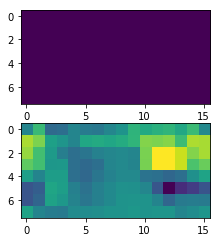

In [6]:
"""
fmap = spheremodel(data.to(device))
#fmap = fmap.reshape(fmap.shape[0], fmap.shape[1], fmap.shape[2]*fmap.shape[3])
print(fmap.shape)

x = fmap.detach().numpy()
plt.figure(figsize=(8, 8))
for i in range(2):
    plt.subplot(4, 1, i + 1)
    plt.imshow(x[0,i,:,:])
plt.show()
"""

In [10]:
"""
path = 'C:/Users/ustundag/Desktop/test_pano_sem.png'
# The more scale down, the less number of unique pixels!
img = np.asarray(Image.open(path).resize((16,8)))
img_pixels    = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
#unique_pixels = np.unique(img_pixels, axis=0)
valid_indexes = [[np.argwhere((img_pixels == p).all(axis=1))[0,0], get_label(p)]
                    for p in unique_pixels
                    if get_label(p) in VALID_OBJECTS]
valid_indexes
"""

[[63, 'board'],
 [84, 'bookcase'],
 [76, 'chair'],
 [78, 'chair'],
 [50, 'door'],
 [87, 'sofa'],
 [90, 'sofa'],
 [89, 'sofa'],
 [92, 'sofa'],
 [105, 'table'],
 [61, 'window']]

### Extract and save features of 7 specific objects using semantics as masks

In [9]:
import assets.utils as u
VALID_OBJECTS = ('board','bookcase','chair','door','sofa','table','window')

import glob
from scipy.io import savemat, loadmat
from IPython.display import display, clear_output
import torchvision.transforms.functional as tfun

def get_label(pix):
    labels = u.load_labels('C:/Users/ustundag/Github/2D-3D-Semantics/assets/semantic_labels.json')
    limit = len(labels)
    i = u.get_index(pix)
    if i < limit:
        instance_label = labels[i]
        instance_label_as_dict = u.parse_label(instance_label)
        label = instance_label_as_dict["instance_class"]
        return label
    return '<UNK>' # unknown in case index is out of bounds in "labels.json" file

def image2tensor(path):
    img = Image.open(path)
    img = img.resize((512,256))
    img = np.asarray(img, dtype=np.float32)
    tensor = tfun.to_tensor(img)
    tensor = tensor[:3,:,:]
    tensor = tensor.unsqueeze_(0)
    return tensor

def create_trained_model(device):
    sphereNet = SphereNetVGG16().to(device)
    # Retrieve SphereNet model state
    sphereNet_state = sphereNet.state_dict()
    
    # Load pre-trained VGG16 model state
    vgg16_dict = torch.load('C:/Users/ustundag/.cache/torch/checkpoints/vgg16-397923af.pth')
    # Cut out the classifier layers at the end
    vgg16_dict = {k: vgg16_dict[k] for k in vgg16_dict.keys() if 'classifier' not in k}

    # Assign VGG16 weights to the layers of SphereNet
    for (k_sph,v_sph), (k_vgg,v_vgg) in zip(sphereNet_state.items(), vgg16_dict.items()):
        sphereNet_state[k_sph] = v_vgg
    
    sphereNet.load_state_dict(sphereNet_state)
    return sphereNet

def save_features_and_labels(file):
    paths = glob.glob("C:\\Users\\ustundag\\GitHub\\2D-3D-Semantics\\area_3\\pano\\rgb\\*.png")
    features = []
    labels = []
    device = torch.device('cpu')
    sphereNet = create_trained_model(device)
    i = 1
    for path in paths:
        clear_output(wait=True)
        tensor = image2tensor(path)
        fmap = sphereNet(tensor.to(device))
        fmap = fmap.detach().numpy()
        fmap = fmap.reshape(fmap.shape[0], fmap.shape[1], fmap.shape[2]*fmap.shape[3])

        # Replace 2 occurrences to find counterpart of RGB image as Semantic
        sem_file   = path.replace("rgb", "semantic", 2)
        sem_img    = np.asarray(Image.open(sem_file).resize((16,8)))
        sem_pixels = sem_img.reshape(sem_img.shape[0]*sem_img.shape[1], sem_img.shape[2])
        #unique_pixels = np.unique(sem_pixels, axis=0)
        valid_indexes = [[np.argwhere((sem_pixels == p).all(axis=1))[0,0], get_label(p)]
                            for p in sem_pixels
                            if get_label(p) in VALID_OBJECTS]
        # first value = feature index, second value = label
        for idx in valid_indexes:
            features.append(fmap[0,:,idx[0]])
            labels.append(VALID_OBJECTS.index(idx[1]))

        display(str(i) + " / 85")
        i += 1
    
    savemat(file,{'features': np.asarray(features),
                  'labels'  : np.asarray(labels)})

In [24]:
file = 'area_3_data_pano_spherenet_VGG16_dims_512_256_16_8_batchNorm_no_relu_after_onlyConv_weights_added.mat'
save_features_and_labels(file)

'85 / 85'

In [25]:
data = loadmat("C:\\Users\\ustundag\\GitHub\\2D-3D-Semantics\\"+file)
features = data["features"]
labels   = data["labels"]

In [26]:
features.shape

(439, 512)

In [27]:
labels.shape

(1, 439)